This notebook compares the different approaches on the same OOD detection dataset

In [1]:
import sys
sys.version

'3.9.2 (default, Feb 28 2021, 17:03:44) \n[GCC 10.2.1 20210110]'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def result(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    plt.figure().set_figwidth(0.5)
    plt.figure().set_figheight(3)
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['In-Dist','Out-Dist'],
            yticklabels=['In-Dist','Out-Dist'])
    plt.ylabel('Prediction',fontsize=10)
    plt.xlabel('Actual',fontsize=10)
    plt.title('Confusion Matrix',fontsize=15)

    plt.show()

    acc = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    print("Accuracy : ",acc)
    print("Precision : ",precision)
    print("Recall : ",recall)
    print("f1 : ",f1)

# Density-Based

## Loading train set

In [4]:
filepath = "../../src/contrastive/results/density-based/wdcproductsmulti80cc20rnd000un-large-/"
filename = "Prob_Density_WDC_wdcproductsmulti80cc20rnd050un_Roberta-base.csv"
energy_score_df1 = pd.read_csv(filepath + filename)
energy_score_df1.head(5)

,Unnamed: 0,actual,predicted
0,0,0,-9.968505
1,1,1,-8.609785
2,2,0,-9.433629
3,3,1,-7.340762
4,4,0,-10.454275


In [5]:
density_train_df = energy_score_df1.copy()
density_train_df["label"] = density_train_df["actual"]
density_train_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
density_train_df.head(3)

,predicted,label
0,-9.968505,0
1,-8.609785,1
2,-9.433629,0


## Loading the test set

In [6]:
energy_score_df2 = pd.read_csv('../../src/contrastive/results/Initial Analysis/Prob_Density_WDC_wdcproductsmulti80cc20rnd050un_valid_large_Roberta-base.csv')
energy_score_df2.head(5)

,Unnamed: 0,actual,predicted
0,0,1,-8.278280
1,1,1,-7.514219
2,2,0,-10.370277
3,3,1,-8.734291
4,4,0,-9.899822


In [7]:
density_test_df = energy_score_df2.copy()
density_test_df["label"] = density_test_df["actual"]
density_test_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
density_test_df.head(3)

,predicted,label
0,-8.278280,1
1,-7.514219,1
2,-10.370277,0


## Initializing the model

In [28]:
reg1 = setup(data = density_train_df, target = 'label',train_size=0.7,session_id = 42)

,Description,Value
0,Session id,42
1,Target,label
2,Target type,Binary
3,Original data shape,"(1000, 2)"
4,Transformed data shape,"(1000, 2)"
5,Transformed train set shape,"(700, 2)"
6,Transformed test set shape,"(300, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [29]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8429,0.9195,0.8257,0.8558,0.8395,0.6857,0.6876,0.1680
ada,Ada Boost Classifier,0.8429,0.9081,0.8600,0.8333,0.8455,0.6857,0.6878,0.0320
nb,Naive Bayes,0.8414,0.9195,0.8171,0.8593,0.8368,0.6829,0.6849,0.1550
ridge,Ridge Classifier,0.8414,0.0000,0.8171,0.8593,0.8368,0.6829,0.6849,0.1620
qda,Quadratic Discriminant Analysis,0.8414,0.9195,0.8171,0.8593,0.8368,0.6829,0.6849,0.1420
lda,Linear Discriminant Analysis,0.8414,0.9195,0.8171,0.8593,0.8368,0.6829,0.6849,0.0220
lightgbm,Light Gradient Boosting Machine,0.8257,0.9012,0.8086,0.8391,0.8212,0.6514,0.6550,0.0760
knn,K Neighbors Classifier,0.8243,0.8882,0.8229,0.8259,0.8230,0.6486,0.6508,0.1630
gbc,Gradient Boosting Classifier,0.8186,0.9067,0.8114,0.8243,0.8168,0.6371,0.6386,0.0340
svm,SVM - Linear Kernel,0.8043,0.0000,0.8600,0.7969,0.8147,0.6086,0.6354,0.1570


In [32]:
lr = create_model('lr')
preds=predict_model(lr, data = density_test_df.drop(columns=["label"]))
preds

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8714,0.9584,0.8571,0.8824,0.8696,0.7429,0.7432
1,0.8143,0.9331,0.8286,0.8056,0.8169,0.6286,0.6288
2,0.9000,0.9682,0.9429,0.8684,0.9041,0.8000,0.8030
3,0.8000,0.8914,0.7143,0.8621,0.7813,0.6000,0.6090
4,0.8571,0.8996,0.8286,0.8788,0.8529,0.7143,0.7155
5,0.8286,0.8931,0.8000,0.8485,0.8235,0.6571,0.6582
6,0.8429,0.9298,0.8571,0.8333,0.8451,0.6857,0.6860
7,0.8000,0.8947,0.7714,0.8182,0.7941,0.6000,0.6010
8,0.8143,0.8759,0.8000,0.8235,0.8116,0.6286,0.6288


,predicted,prediction_label,prediction_score
0,-8.278280,1,0.7004
1,-7.514219,1,0.9056
2,-10.370277,0,0.9532
3,-8.734291,1,0.5018
4,-9.899822,0,0.8952
...,...,...,...
995,-9.851101,0,0.8865
996,-10.360264,0,0.9524
997,-9.466063,0,0.7932
998,-8.767303,0,0.5134


<Figure size 50x550 with 0 Axes>

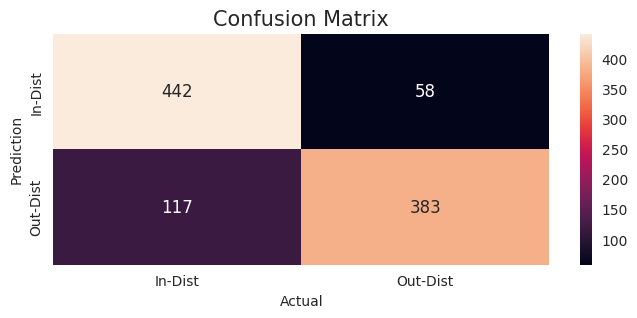

Accuracy :  0.825
Precision :  0.8684807256235828
Recall :  0.766
f1 :  0.8140276301806588


In [33]:
y_target = density_test_df["label"]
y_pred = preds["prediction_label"]
result(y_target ,y_pred)

In [11]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Distance-Based

## Train data

In [34]:
filepath = "../../src/contrastive/results/distance-based/wdcproductsmulti80cc20rnd000un-large-/"
filename = "Prob_Density_WDC_wdcproductsmulti80cc20rnd050un_Roberta-base.csv"
mahal_score_df1 = pd.read_csv(filepath + filename)
mahal_score_df1.head(5)

,Unnamed: 0,actual,predicted
0,0,0,0.065887
1,1,1,0.483735
2,2,0,0.289816
3,3,1,0.793431
4,4,0,0.124290


In [35]:
dist_train_df = mahal_score_df1.copy()
dist_train_df["label"] = dist_train_df["actual"]
dist_train_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
dist_train_df.head(3)

,predicted,label
0,0.065887,0
1,0.483735,1
2,0.289816,0


## Test Data

In [36]:
filepath = "../../src/contrastive/results/distance-based/wdcproductsmulti80cc20rnd050un_valid_large.json-large-/"
filename = "Prob_Density_WDC_preprocessed_wdcproductsmulti80cc20rnd050un_valid_large_Roberta-base.csv"
mahal_score_df2 = pd.read_csv(filepath + filename)
mahal_score_df2.head(5)

,Unnamed: 0,actual,predicted
0,0,1,0.236001
1,1,1,2.377320
2,2,0,0.263565
3,3,1,0.226611
4,4,0,0.056131


In [13]:
dist_test_df = mahal_score_df2.copy()
dist_test_df["label"] = dist_test_df["actual"]
dist_test_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
dist_test_df.head(3)

,predicted,label
0,0.236001,1
1,2.377320,1
2,0.263565,0


In [14]:
reg2 = setup(data = dist_train_df, target = 'label',train_size=0.7,session_id= 4152)

,Description,Value
0,Session id,4152
1,Target,label
2,Target type,Binary
3,Original data shape,"(1000, 2)"
4,Transformed data shape,"(1000, 2)"
5,Transformed train set shape,"(700, 2)"
6,Transformed test set shape,"(300, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [15]:
best2=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7086,0.0000,0.4800,0.8866,0.6160,0.4171,0.4705,0.1580
lda,Linear Discriminant Analysis,0.7086,0.8039,0.4800,0.8866,0.6160,0.4171,0.4705,0.0520
nb,Naive Bayes,0.7071,0.7001,0.4657,0.9018,0.6080,0.4143,0.4738,0.3330
qda,Quadratic Discriminant Analysis,0.7071,0.7001,0.4657,0.9018,0.6080,0.4143,0.4738,0.1570
lr,Logistic Regression,0.7057,0.8039,0.5200,0.8379,0.6342,0.4114,0.4484,0.2530
knn,K Neighbors Classifier,0.7043,0.7793,0.6743,0.7228,0.6937,0.4086,0.4135,0.2500
lightgbm,Light Gradient Boosting Machine,0.6800,0.7866,0.6714,0.6956,0.6760,0.3600,0.3675,0.0780
ada,Ada Boost Classifier,0.6786,0.7804,0.5771,0.7373,0.6393,0.3571,0.3723,0.1820
gbc,Gradient Boosting Classifier,0.6786,0.7811,0.6257,0.7096,0.6588,0.3571,0.3653,0.2470
svm,SVM - Linear Kernel,0.6714,0.0000,0.4457,0.8715,0.5555,0.3429,0.4135,0.1510


In [37]:
knn = create_model('knn')
preds=predict_model(knn, data = dist_test_df.drop(columns=["label"]))
preds

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8714,0.9490,0.9143,0.8421,0.8767,0.7429,0.7456
1,0.8000,0.8604,0.7714,0.8182,0.7941,0.6000,0.6010
2,0.8429,0.8971,0.8857,0.8158,0.8493,0.6857,0.6882
3,0.7857,0.8220,0.7429,0.8125,0.7761,0.5714,0.5735
4,0.8429,0.8984,0.8571,0.8333,0.8451,0.6857,0.6860
5,0.7714,0.8718,0.7714,0.7714,0.7714,0.5429,0.5429
6,0.8429,0.9065,0.9143,0.8000,0.8533,0.6857,0.6928
7,0.8000,0.8690,0.7714,0.8182,0.7941,0.6000,0.6010
8,0.8000,0.8796,0.7429,0.8387,0.7879,0.6000,0.6040


,predicted,prediction_label,prediction_score
0,0.236001,1,1.0
1,2.377320,1,1.0
2,0.263565,1,1.0
3,0.226611,1,1.0
4,0.056131,1,1.0
...,...,...,...
995,0.556538,1,1.0
996,0.256931,1,1.0
997,1.043575,1,1.0
998,0.085562,1,1.0


<Figure size 50x550 with 0 Axes>

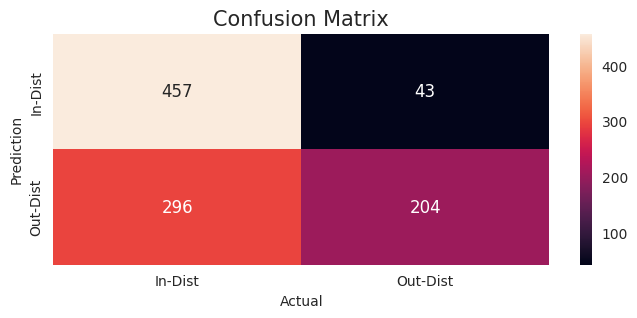

Accuracy :  0.661
Precision :  0.8259109311740891
Recall :  0.408
f1 :  0.5461847389558233


In [24]:
y_test = dist_test_df["label"]
y_pred = preds["prediction_label"]
result(y_test ,y_pred)

In [29]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Classification-Based

In [16]:
filepath = "../../src/contrastive/results/classification-based/wdcproductsmulti80cc20rnd050un_gs.pkl-large-/"
filename = "Prob_Density_WDC_wdcproductsmulti80cc20rnd050un_Roberta-base.csv"
conf_score_df1 = pd.read_csv(filepath + filename)
conf_score_df1.head(5)

,Unnamed: 0,actual,predicted
0,0,0,0.507140
1,1,1,0.592725
2,2,0,0.629069
3,3,1,0.602225
4,4,0,0.488632


In [17]:
conf_train_df = conf_score_df1.copy()
conf_train_df["label"] = conf_train_df["actual"]
conf_train_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
conf_train_df.head(3)

,predicted,label
0,0.507140,0
1,0.592725,1
2,0.629069,0


Loading test set

In [18]:
filepath = "../../src/contrastive/results/classification-based/wdcproductsmulti80cc20rnd050un_valid_large.json-large-/"
filename = "Prob_Density_WDC_preprocessed_wdcproductsmulti80cc20rnd050un_valid_large_Roberta-base.csv"
conf_score_df2 = pd.read_csv(filepath + filename)
conf_score_df2.head(5)

,Unnamed: 0,actual,predicted
0,0,1,0.468295
1,1,1,0.542516
2,2,0,0.440609
3,3,1,0.376556
4,4,0,0.650340


In [19]:
conf_test_df = conf_score_df2.copy()
conf_test_df["label"] = conf_test_df["actual"]
conf_test_df.drop(["Unnamed: 0","actual"],axis=1, inplace = True)
conf_test_df.head(3)

,predicted,label
0,0.468295,1
1,0.542516,1
2,0.440609,0


In [20]:
reg3 = setup(data = conf_train_df, target = 'label',train_size=0.7)

,Description,Value
0,Session id,2847
1,Target,label
2,Target type,Binary
3,Original data shape,"(1000, 2)"
4,Transformed data shape,"(1000, 2)"
5,Transformed train set shape,"(700, 2)"
6,Transformed test set shape,"(300, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [21]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5657,0.5793,0.5743,0.5644,0.5673,0.1314,0.1324,0.0610
nb,Naive Bayes,0.5657,0.5990,0.7686,0.5475,0.6380,0.1314,0.1465,0.0250
qda,Quadratic Discriminant Analysis,0.5643,0.5990,0.7686,0.5465,0.6373,0.1286,0.1435,0.0250
lr,Logistic Regression,0.5543,0.5816,0.6114,0.5545,0.5776,0.1086,0.1109,0.0470
ridge,Ridge Classifier,0.5543,0.0000,0.6114,0.5545,0.5776,0.1086,0.1109,0.0200
lda,Linear Discriminant Analysis,0.5543,0.5816,0.6114,0.5545,0.5776,0.1086,0.1109,0.0230
dt,Decision Tree Classifier,0.5486,0.5486,0.5400,0.5481,0.5429,0.0971,0.0977,0.0220
rf,Random Forest Classifier,0.5486,0.5731,0.5400,0.5481,0.5429,0.0971,0.0977,0.0620
lightgbm,Light Gradient Boosting Machine,0.5486,0.5774,0.5857,0.5480,0.5639,0.0971,0.0978,108.3620
svm,SVM - Linear Kernel,0.5457,0.0000,0.6571,0.4750,0.4852,0.0914,0.1559,0.0200


In [21]:
lr_classification = create_model('lr')
preds=predict_model(lr_classification, data = conf_test_df.drop(columns=["label"]))
preds

,predicted,prediction_label,prediction_score
0,0.468296,0,0.5272
1,0.542516,1,0.5135
2,0.440609,0,0.5423
3,0.376556,0,0.5770
4,0.650340,1,0.5721
...,...,...,...
995,0.478786,0,0.5215
996,0.366324,0,0.5824
997,0.522065,1,0.5023
998,0.568470,1,0.5277


<Figure size 36x288 with 0 Axes>

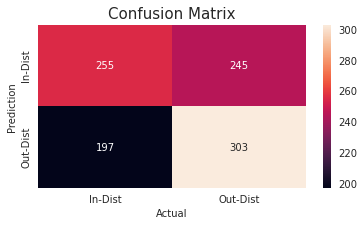

Accuracy :  0.558
Precision :  0.5529197080291971
Recall :  0.606
f1 :  0.5782442748091603


In [22]:
y_target = conf_test_df["label"]
y_pred = preds["prediction_label"]
result(y_target ,y_pred)